<a href="https://colab.research.google.com/github/svfabi/Fabiano/blob/master/Ajustado_Formula_Aproxima%C3%A7%C3%A3osomatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

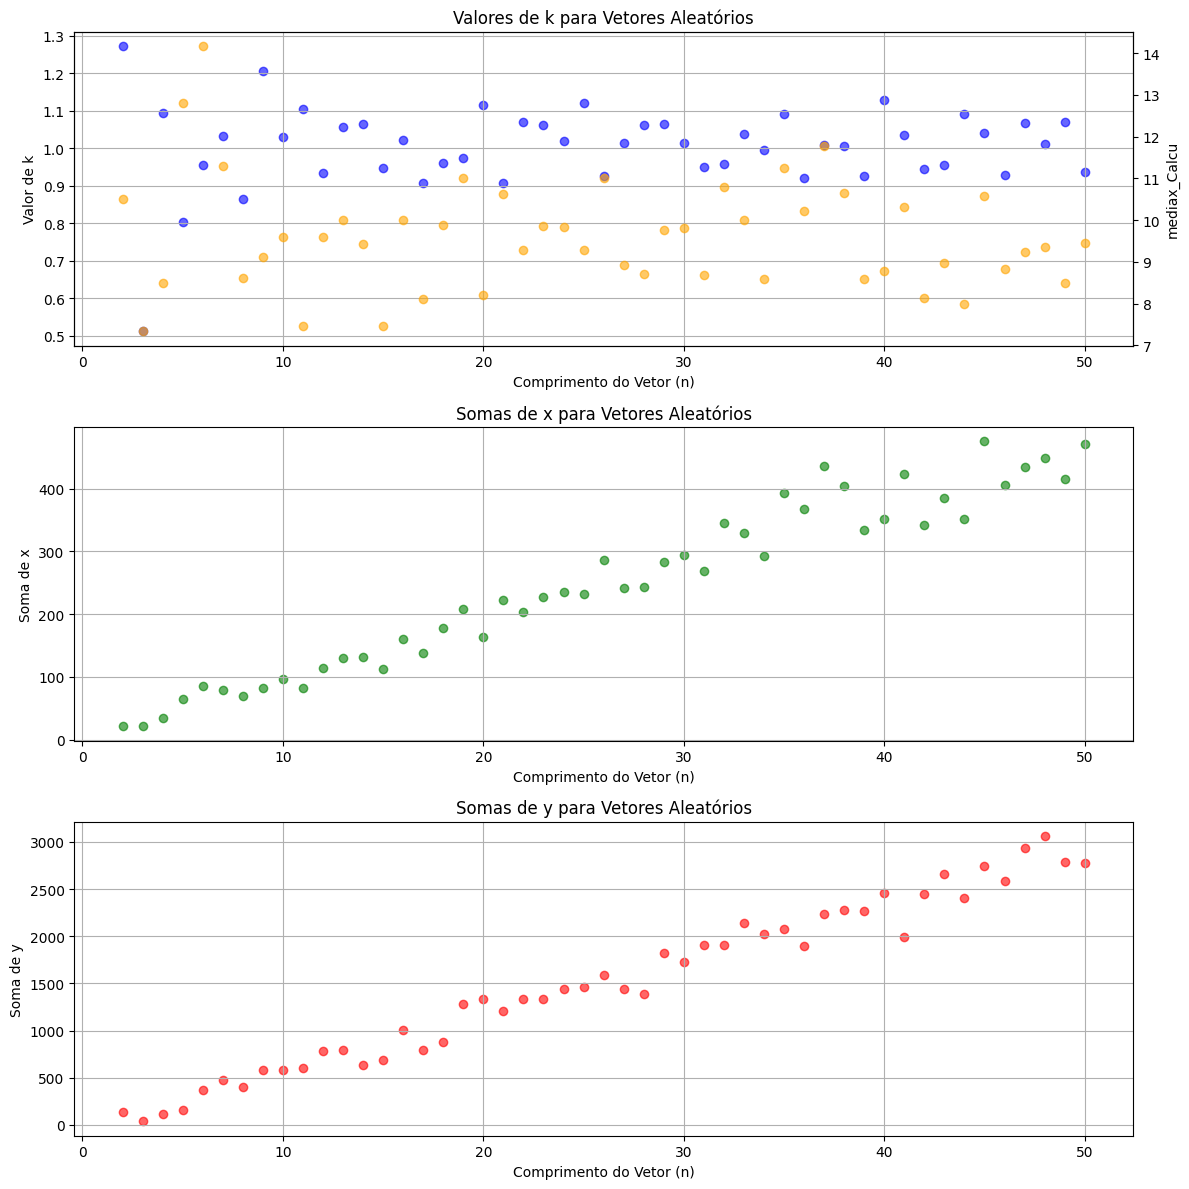

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# código para encontrar uma função que aproxime valores de sumxy de sumxsumy
# gera vetores de tamanhos e valores aleatórios e verifica o valor de K
# k próximos de 1 a função é a melhor para representar a aproximação
# da função para todos os valores de comprimento de vetor e seus valores xi e yi
# Versão Corrigida para calcular o Erro Corretamente
# Antes a fórmula era k = (sum_x*sum_y) / (sum_xy +  sum_y * (n - 1)))
#23-10-2024 Codigo atualizado para gerar numero de vetores para cada n individualmnete
#antes estava aleatorio.

def calcular_k(x, y):
    n = len(x)
    mediax = 9.8
    mediax_Calcu = np.sum(x)/n
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)

    # Corrigida a fórmula para k: multiplicando sum_xy por (n-1)
    # para tentar melhor esta aproximação tenho de ver a fórmula geral
    k = (sum_xy) / (mediax_Calcu *(n* sum_y -  sum_y * (n - 1)))

    return k, sum_x, sum_y, mediax_Calcu

# Gerar vetores aleatórios e calcular k
n_vetores = 1 # número de vetores gerados para cada comprimento de vetor
n_Len_Vetor = 50 # comprimento máximo do vetor gerado aleatoriamente
n_Len_Vetor_Inicial = 2 # comprimento inicial do vetor gerado aleatoriamente
n_Valoresx = 20 # Valor máximo dos valores de xi e yi
n_Valoresy = 120 # Valor máximo dos valores de xi e yi
comprimentos = np.arange(n_Len_Vetor_Inicial, n_Len_Vetor + 1)
ks = []
somas_x = []
somas_y = []
mediax_Calcus = []

for n in comprimentos:
    for _ in range(n_vetores):
        x = np.random.randint(0, n_Valoresx, n)
        y = np.random.randint(0, n_Valoresy, n)
        k, sum_x, sum_y, mediax_Calcu = calcular_k(x, y)
        ks.append(k)
        somas_x.append(sum_x)
        somas_y.append(sum_y)
        mediax_Calcus.append(mediax_Calcu)

# Plotar os resultados
plt.figure(figsize=(12, 12))

# Gráfico de k
plt.subplot(3, 1, 1)
plt.scatter(comprimentos.repeat(n_vetores), ks, color='blue', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Valor de k')
plt.title('Valores de k para Vetores Aleatórios')
plt.grid(True)

# Adicionar escala do lado direito para mediax_Calcu
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.set_ylabel('mediax_Calcu')
ax2.scatter(comprimentos.repeat(n_vetores), mediax_Calcus, color='orange', alpha=0.6)

# Gráfico de somas_x
plt.subplot(3, 1, 2)
plt.scatter(comprimentos.repeat(n_vetores), somas_x, color='green', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Soma de x')
plt.title('Somas de x para Vetores Aleatórios')
plt.grid(True)

# Gráfico de somas_y
plt.subplot(3, 1, 3)
plt.scatter(comprimentos.repeat(n_vetores), somas_y, color='red', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Soma de y')
plt.title('Somas de y para Vetores Aleatórios')
plt.grid(True)

plt.tight_layout()
plt.show()
